# Bayes Classifier - Credit Card Default Dataset

### Personal Notes

#### Sources
- Credit card fraud dataset : https://www.kaggle.com/dalpozz/creditcardfraud
- Credit card default payment dataset : https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
- BayesPy library : http://www.bayespy.org/user_guide/install.html#installing-bayespy (only for Python 3)
- For Random forest implementation, see : https://www.kaggle.com/moscolitos/exploratory-data-analysis/code
- Source for VEDA : https://www.kaggle.com/mahyar511/payment-default-prediction-neural-network
- Gaussian Naive Bayes : http://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/ (sklearn)
- Sklearn Naive bayes API : http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

#### Improvement ideas for the project
- In the report, evaluate each classifier and make a choice on the best model (https://www.youtube.com/watch?v=85dtiMz9tSo)
    * confusion matrix
    * changing classification threshold (usually from 1-50% class A, from 51-100% class B, here the threshold is 50%)
    * ROC curve
    * AUC curve
- Use K-fold cross validation instead of just test/train ?
- Check if it's possible (and relevant) to reduce the dimensionality of the dataset ?

### 0- Libraries importation

In [85]:
import numpy as np
import pandas
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


### 1- Basic informations on data

In [45]:
## IMPORTING DATASET ##
## source: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/data ##
data = pandas.read_csv('UCI_Credit_Card.csv')

print('------ Basic informations on dataset ------')
print data['default.payment.next.month'].value_counts() # ouput number of 0 class and number of 1 class
data.info()
# print data.describe()

------ Basic informations on dataset ------
0    23364
1     6636
Name: default.payment.next.month, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_

### 2- Visual Exploratory Data Analysis

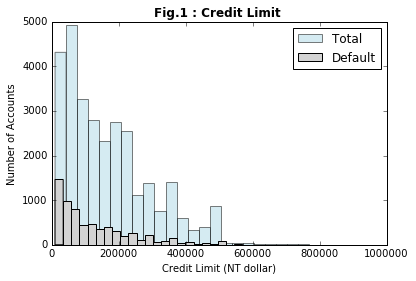

In [46]:
# Credit Limit (Feature name : 'LIMIT_BAL')
bins = 30
plt.hist(data.LIMIT_BAL, bins = bins, color='lightblue',label = 'Total',alpha=0.5)
plt.hist(data.LIMIT_BAL[data['default.payment.next.month'] == 1], bins = bins, color='lightgray',label = 'Default')

plt.xlabel('Credit Limit (NT dollar)');plt.ylabel('Number of Accounts')
plt.title('Fig.1 : Credit Limit ',fontweight="bold", size=12)
plt.legend();plt.show()

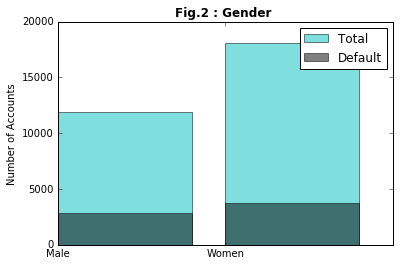

In [6]:
# Gender (Feature name : 'SEX')
men = data['SEX'][data['SEX']==1].count()
men_default = data['SEX'][(data['SEX']==1)&(data['default.payment.next.month']==1)].count()

women = data['SEX'][data['SEX']==2].count()
women_default = data['SEX'][(data['SEX']==2)&(data['default.payment.next.month']==1)].count()

total_sex = [men, women]
default_sex = [men_default,women_default]
gender = [1,2]
plt.bar(gender,total_sex, color='c',alpha=0.5, label='Total')
plt.bar(gender,default_sex, color='k',alpha=0.5, label='Default')

plt.xticks([1,2],['Male','Women']);plt.ylabel('Number of Accounts')
plt.title('Fig.2 : Gender ',fontweight="bold", size=12)
plt.legend();plt.show()

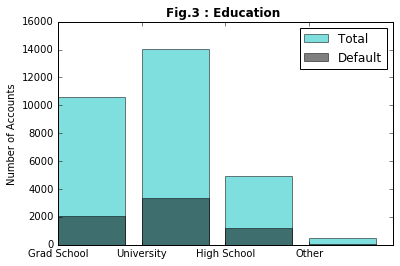

In [7]:
# Education (Feature name :'EDUCATION' )
grad =  data['EDUCATION'][data['EDUCATION']==1].count()
grad_default = data['EDUCATION'][(data['EDUCATION']==1)&(data['default.payment.next.month']==1)].count()

uni =  data['EDUCATION'][data['EDUCATION']==2].count()
uni_default = data['EDUCATION'][(data['EDUCATION']==2)&(data['default.payment.next.month']==1)].count()

high =  data['EDUCATION'][data['EDUCATION']==3].count()
high_default = data['EDUCATION'][(data['EDUCATION']==3)&(data['default.payment.next.month']==1)].count()

other =  data['EDUCATION'][data['EDUCATION'] > 3].count()
other_default = data['EDUCATION'][(data['EDUCATION'] > 3)&(data['default.payment.next.month']==1)].count()

total_education = [grad, uni, high, other]
default_education = [grad_default,uni_default,high_default, other_default]
degree = [1,2,3,4]
plt.bar(degree,total_education, color='c',alpha=0.5, label='Total')
plt.bar(degree,default_education, color='k',alpha=0.5, label='Default')

plt.xticks([1,2,3,4],['Grad School','University','High School','Other'])
plt.ylabel('Number of Accounts');plt.title('Fig.3 : Education ',fontweight="bold", size=12)
plt.legend();plt.show()

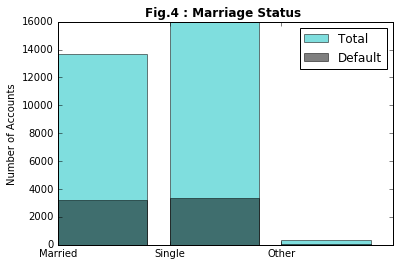

In [8]:
# Marriage Status (Feature name :'MARRIAGE')
married =  data['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = data['MARRIAGE'][(data['MARRIAGE']==1)&(data['default.payment.next.month']==1)].count()

single =  data['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = data['MARRIAGE'][(data['MARRIAGE']==2)&(data['default.payment.next.month']==1)].count()

other =  data['MARRIAGE'][data['MARRIAGE']==3].count()
other_default = data['MARRIAGE'][(data['MARRIAGE']==3)&(data['default.payment.next.month']==1)].count()

total_marriage = [married, single, other]
default_marriage = [married_default,single_default,other_default]
status = [1,2,3]
plt.bar(status,total_marriage, color='c',alpha=0.5, label='Total')
plt.bar(status,default_marriage, color='k',alpha=0.5, label='Default')

plt.xticks([1,2,3],['Married','Single','Other']); plt.ylabel('Number of Accounts')
plt.title('Fig.4 : Marriage Status ',fontweight="bold", size=12)
plt.legend(); plt.show()

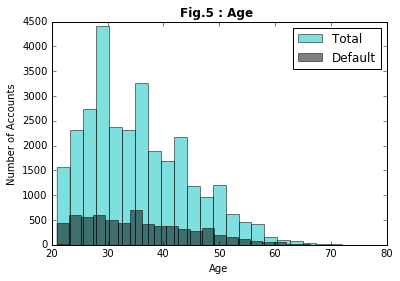

In [9]:
# Age (Feature name :'AGE' )
bins = 25

plt.hist(data['AGE'],bins = bins, color='c',label = 'Total',alpha=0.5)
plt.hist(data['AGE'][data['default.payment.next.month']==1], bins = bins, color='k',label = 'Default',alpha=0.5)

plt.xlabel('Age'); plt.ylabel('Number of Accounts')
plt.title('Fig.5 : Age ',fontweight="bold", size=12)
plt.legend();plt.show()

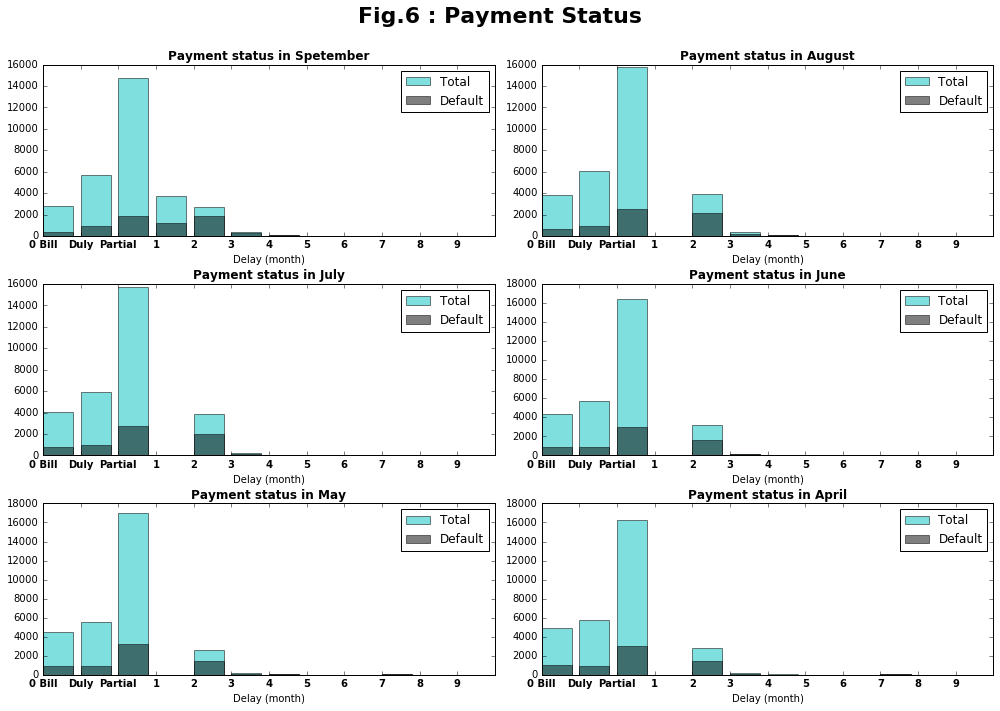

In [10]:
# Payment status (Feature name :'PAY_' )
import matplotlib.gridspec as gridspec
features = list(data.columns)
plt.figure(figsize=(14,10))

gs = gridspec.GridSpec(3,2)
i = 0

plt.suptitle('Fig.6 : Payment Status',fontweight="bold", fontsize=22)
for cn in features[6:12]:
    ax = plt.subplot(gs[i])
    delay = np.zeros(12)
    delay_default = np.zeros(12)  
    for j in np.arange(0,12):
            delay[j] = data[cn][data[cn]==j-2].count()
            delay_default[j] = data[cn][(data[cn]==j-2)&(data['default.payment.next.month']==1)].count()  

    month = [-2,-1,0,1,2,3,4,5,6,7,8,9]
    plt.bar(month,delay, color='c',alpha=0.5, label='Total')
    plt.bar(month,delay_default, color='k',alpha=0.5, label='Default')

    plt.xticks([-2,-1,0,1,2,3,4,5,6,7,8,9],['0 Bill','Duly','Partial','1','2','3','4','5','6','7','8','9'], fontweight="bold", size=10)
    ax.set_xlabel('Delay (month)')
    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Payment status in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1
    
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

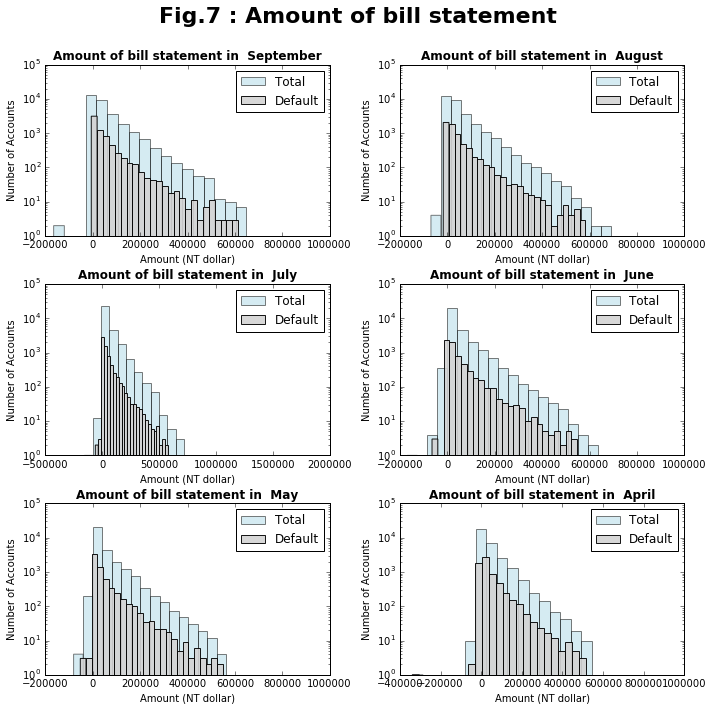

In [11]:
# Amount of bill statement (Feature name :'BILL_AMT_' )

features = list(data.columns)
plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3,2)
i = 0
plt.suptitle('Fig.7 : Amount of bill statement',fontweight="bold", fontsize=22)
for cn in features[12:18]:
    ax = plt.subplot(gs[i])
    bins = 25
    plt.hist(data[cn],bins = bins, color='lightblue',label = 'Total',alpha=0.5)
    plt.hist(data[cn][data['default.payment.next.month']==1], bins = bins, color='lightgray',label = 'Default',alpha=0.9)

    plt.xlabel('Amount (NT dollar)')
    plt.ylabel('Number of Accounts')
    ax.set_yscale('log', nonposy='clip')

    months = ['September','August','July','June','May','April']
    ax.set_title('Amount of bill statement in  ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1  
    plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

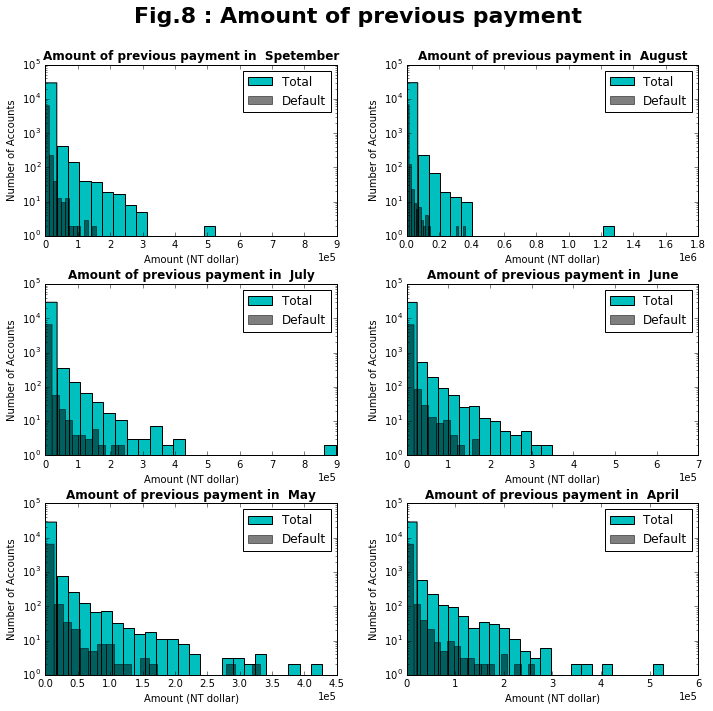

In [12]:
# Amount of previous payment (Feature name :'PAY_AMT_' )
features = list(data.columns)
plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3,2)
i = 0
plt.suptitle('Fig.8 : Amount of previous payment',fontweight="bold", fontsize=22)
for cn in features[18:24]:
    ax = plt.subplot(gs[i])
    bins = 25
    plt.hist(data[cn],bins = bins, color='c',label = 'Total',alpha=1)
    plt.hist(data[cn][data['default.payment.next.month']==1], bins = bins, color='k',label = 'Default',alpha=0.5)

    plt.xlabel('Amount (NT dollar)')
    plt.ylabel('Number of Accounts')
    ax.set_yscale('log', nonposy='clip')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Amount of previous payment in  ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1      
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

### 3- Gaussian Naive Bayes (scikit library)

----- Gaussian Naive Bayes results -----
Classification accuracy is : 37.5757575758 %
Null accuracy is : 77.4747474747 %
Classification error is : 62.4242424242 %
Sensitivity is : 88.9237668161 %


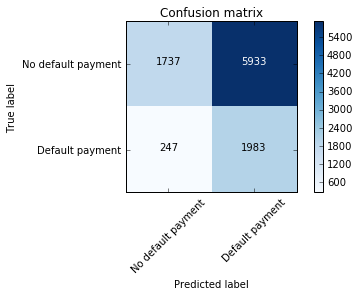

Decreasing threshold from 0.5 to 0.3 (will classify more easily into default payment)


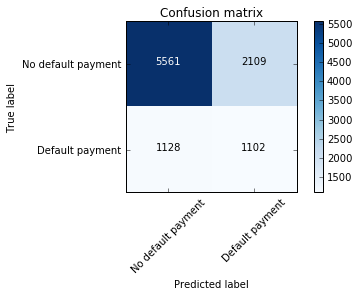




----- Bernouilli Naive Bayes results -----
Classification accuracy is : 77.0808080808 %
Null accuracy is : 77.4747474747 %
Classification error is : 22.9191919192 %
Sensitivity is : 49.6412556054 %


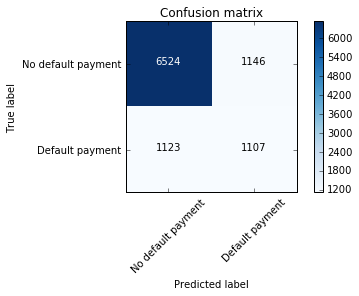

In [89]:
features = data.values[:,1:-1]
target = data.values[:,-1]

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.33, random_state = 10)

#Note:prior are calculated based on the data.http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
clf_gaussian = GaussianNB()
clf_gaussian.fit(features_train, target_train)
target_pred = clf_gaussian.predict(features_test)

print '----- Gaussian Naive Bayes results -----'
# Classification accuracy -> how often the classifier is correct
print 'Classification accuracy is :', metrics.accuracy_score(target_test, target_pred, normalize = True) * 100, '%'
# Calculate null accuracy for binary classification problems coded as 0 and 1.
# Null accuracy : accuracy that could be achieved by always predicting the most frequent class
print 'Null accuracy is :', max(target_test.mean(), 1 - target_test.mean()) * 100, '%'
# Classification error -> how often the classifier is incorrect
print 'Classification error is :', (1- accuracy_score(target_test, target_pred, normalize = True)) * 100, '%'
# When the actual value is positive (1 -> default), how often the prediction is correct ?
print 'Sensitivity is :', metrics.recall_score(target_test, target_pred) * 100, '%'
# Confusion matrix (2x2 matrix since there is 2 response classes)
# TP (True positive : correctly predicted class 0) TN (True negative : correctly predicted class 1) 
# FP (False positive : incorrectly predicted class 0) FN (False negative : incorrectly predicted class 1)
confusion_matrix = metrics.confusion_matrix(target_test, target_pred)
plot_confusion_matrix(confusion_matrix, classes=['No default payment', 'Default payment'], normalize=False, title='Confusion matrix')
plt.show()

print 'Decreasing threshold from 0.5 to 0.3 (will classify more easily into default payment)'
logreg.fit(features_train, target_train)
y_pred_prob = logreg.predict_proba(features_test)[:,1]
target_pred_with_decreased_threshold = binarize([y_pred_prob], 0.3)[0]
confusion_matrix = metrics.confusion_matrix(target_test, target_pred_with_decreased_threshold)
plot_confusion_matrix(confusion_matrix, classes=['No default payment', 'Default payment'], normalize=False, title='Confusion matrix')
plt.show()
# NOTE : problem here, should predict default payment more often but predict no default payment more often instead. check where is the issue

# TODO : ROC and AUC to check how sensitivy and specificity are affected by various thresholds

print ''
print ''
print ''

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.33, random_state = 10)

clf_bernouilli = BernoulliNB()
clf_bernouilli.fit(features_train, target_train)
target_pred = clf_bernouilli.predict(features_test)

print '----- Bernouilli Naive Bayes results -----'
print 'Classification accuracy is :', accuracy_score(target_test, target_pred, normalize = True) * 100, '%'
print 'Null accuracy is :', max(target_test.mean(), 1 - target_test.mean()) * 100, '%'
print 'Classification error is :', (1- accuracy_score(target_test, target_pred, normalize = True)) * 100, '%'
print 'Sensitivity is :', metrics.recall_score(target_test, target_pred) * 100, '%'
confusion_matrix = metrics.confusion_matrix(target_test, target_pred)
plot_confusion_matrix(confusion_matrix, classes=['No default payment', 'Default payment'], normalize=False, title='Confusion matrix')
plt.show()

## Results Analysis

### Gaussian Naive Bayes Analysis

The model accuracy is very low, only 37,57 %.
If the model had always guessed the most representative class (No default payment) he will have a 77,47% accuracy.
From the confusion matrix we can see that the model predicted 5933 default payment who were in fact non defaulted.
(TODO : search why the model made such prediction ? Doesnt make sense at first glance .... maybe an error somewhere with the prior ?)

From the confusion matrix, it's possible to get several metrics (Precision, Specificity, Sensitivity, etc..)
Since our business objective is to check whether a payment is defaulted or not, the metrics we should focus on is Sensitivity.
Sensitivity allow us to know how often the prediction for a default payment is correct.
A classification error for a true non-default payment is more acceptable than the other way around. (it's better for the enterprise to think that a payment will be defaulted and that it will not be at the end, rather than thinking that a payment will not be defaulted but it will be at the end)

Decreasing the threshold will increase the sensitivity (because it will be easier to predict the defaulted payment class)


### Bernouilli Naive Bayes Analysis



## Utility functions and classes

In [104]:
# source : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gaussian Naive Bayes - Credit Card Fraud Dataset

### 1- Basic informations on data

In [42]:
## IMPORTING DATASET ##
## source: https://www.kaggle.com/dalpozz/creditcardfraud ##
data_credit_card_fraud = pandas.read_csv('creditcard.csv')

print('------ Basic informations on dataset ------')
data_credit_card_fraud.Class.value_counts() # ouput number of 0 class and number of 1 class
data_credit_card_fraud.info()
# print data.describe()

------ Basic informations on dataset ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null flo

### 2- Visual Exploratory Data Analysis

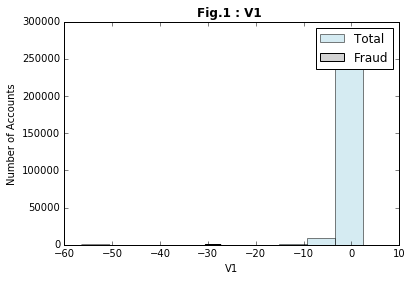

In [103]:
# V1
bins = 10
plt.hist(data_credit_card_fraud.V1, bins = bins, color='lightblue',label = 'Total',alpha=0.5)
plt.hist(data_credit_card_fraud.V1[data_credit_card_fraud['Class'] == 1], bins = bins, color='lightgray',label = 'Fraud')

plt.xlabel('V1');plt.ylabel('Number of Accounts')
plt.title('Fig.1 : V1 ',fontweight="bold", size=12)
plt.legend();plt.show()

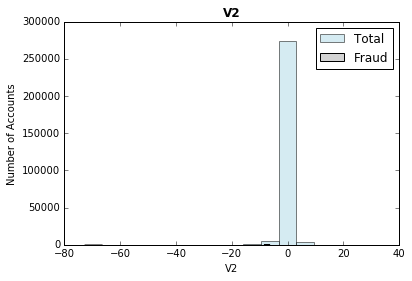

In [102]:
# V2
bins = 15
plt.hist(data_credit_card_fraud.V2, bins = bins, color='lightblue',label = 'Total',alpha=0.5)
plt.hist(data_credit_card_fraud.V2[data_credit_card_fraud['Class'] == 1], bins = bins, color='lightgray',label = 'Fraud')

plt.xlabel('V2');plt.ylabel('Number of Accounts')
plt.title('V2',fontweight="bold", size=12)
plt.legend();plt.show()

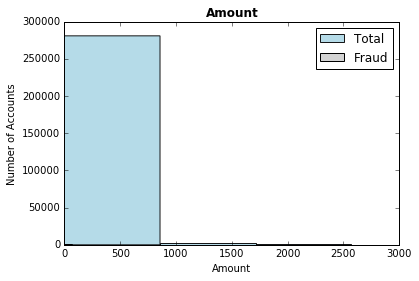

In [122]:
# Amount
bins = 30
plt.hist(data_credit_card_fraud.Amount, bins = bins, color='lightblue',label = 'Total',alpha=0.9)
plt.hist(data_credit_card_fraud.Amount[data_credit_card_fraud['Class'] == 1], bins = bins, color='lightgray',label = 'Fraud')

plt.xlabel('Amount');plt.ylabel('Number of Accounts')
plt.title('Amount',fontweight="bold", size=12)
axes = plt.gca()
axes.set_xlim([0,3000])
plt.legend();plt.show()

### 3- Gaussian Naive Bayes (scikit library)

----- Gaussian Naive Bayes results -----
Model accuracy is : 97.7794801409 %
Model null accuracy is : 99.8286997138 %


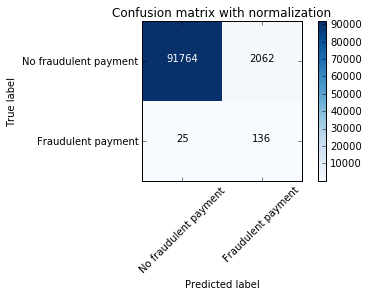




----- Bernouilli Naive Bayes results -----
Model accuracy is : 99.9276495686 %
Model null accuracy is : 99.8286997138 %


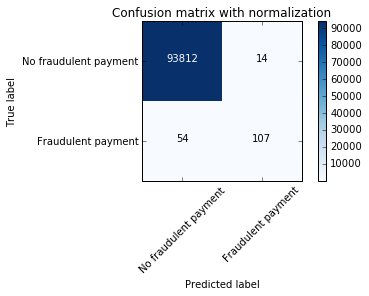

In [71]:
features = data_credit_card_fraud.values[:,1:-1]
target = data_credit_card_fraud.values[:,-1]

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.33, random_state = 10)

#Note:prior are calculated based on the data.http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
clf_gaussian = GaussianNB()
clf_gaussian.fit(features_train, target_train)
target_pred = clf_gaussian.predict(features_test)

print '----- Gaussian Naive Bayes results -----'
print 'Model accuracy is :', accuracy_score(target_test, target_pred, normalize = True) * 100, '%'
print 'Model null accuracy is :', max(target_test.mean(), 1 - target_test.mean()) * 100, '%'
confusion_matrix = metrics.confusion_matrix(target_test, target_pred)
plot_confusion_matrix(confusion_matrix, classes=['No fraudulent payment', 'Fraudulent payment'], normalize=False, title='Confusion matrix with normalization')
plt.show()

print ''
print ''
print ''

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.33, random_state = 10)

clf_bernouilli = BernoulliNB()
clf_bernouilli.fit(features_train, target_train)
target_pred = clf_bernouilli.predict(features_test)

print '----- Bernouilli Naive Bayes results -----'
print 'Model accuracy is :', accuracy_score(target_test, target_pred, normalize = True) * 100, '%'
print 'Model null accuracy is :', max(target_test.mean(), 1 - target_test.mean()) * 100, '%'
confusion_matrix = metrics.confusion_matrix(target_test, target_pred)
plot_confusion_matrix(confusion_matrix, classes=['No fraudulent payment', 'Fraudulent payment'], normalize=False, title='Confusion matrix with normalization')
plt.show()

## Results Analysis

### Gaussian Naive Bayes Analysis
TODO

### Bernouilli Naive Bayes Analysis
TODO


## IDEA FROM COMMENTS 
- throwing away some data to make the dataset more balanced. what is the impact ?
- does the default dataset contains information from the fraud one ? and vice versa ?
- mix default and fraud dataset and see how it affects performance (therefore having 4 classes : default, fraud, non default, non fraud)